In [1]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

/Users/thomascross/opt/anaconda3/lib/python3.8/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
#Import Desired PES
from ipynb.fs.full.O3_PES_fortran_DAWES import PES

### Manual Inputs

In [3]:
#Temperature
T = 300

In [4]:
molecule = ["O-17", "O-17", "O-17"]

In [5]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [6]:
mass = ((element[molecule[0]] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element[molecule[2]] * u * kg_to_me))

In [7]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

R_com [0.        0.4444661 0.       ]
r_COMalpha [[-1.08328032  0.22223305  0.        ]
 [ 0.         -0.4444661   0.        ]
 [ 1.08328032  0.22223305  0.        ]]


### Calculations 

In [8]:
Key, Pos =  Key_and_Pos(coord)

In [9]:
PES_func = PES(Key, Pos, molecule)

In [10]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [11]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [12]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [13]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [14]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [15]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [16]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [17]:
sigma = sigma_ij(displace_val, cubic)

In [18]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [19]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

R_com [-1.21667800e-07  4.44464975e-01 -4.65583342e-19]
r_COMalpha [[-1.08647255e+00  2.20604978e-01 -9.18210035e-19]
 [-9.85477302e-03 -4.47268026e-01  4.53037749e-19]
 [ 1.09632732e+00  2.26663048e-01  4.65172286e-19]]
R_com [ 7.82676600e-17  4.44466100e-01 -5.21528124e-29]
r_COMalpha [[-1.08328032e+00  2.22233050e-01 -1.07003735e-28]
 [-1.15041239e-12 -4.44466100e-01  5.49137908e-29]
 [ 1.08328032e+00  2.22233050e-01  5.20899444e-29]]
R_com [-7.60025973e-08  4.44464926e-01 -4.27325660e-19]
r_COMalpha [[-1.08680055e+00  2.21171760e-01 -8.39315344e-19]
 [-6.15601123e-03 -4.46127834e-01  4.12356278e-19]
 [ 1.09295656e+00  2.24956073e-01  4.26959066e-19]]


In [20]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_777_13DaLo_specconst")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1088.759562    1069.261409  3.346580  3.305505  3.346580  3.321981
1  1056.939123    1009.375091  0.422531  0.416227  0.422531  0.417414
2   687.451021     670.370799  0.375163  0.369677  0.375163  0.370820


In [21]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [22]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 74/74 [00:10<00:00,  6.85it/s] 


In [23]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 74/74 [00:13<00:00,  5.52it/s] 


In [24]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 74/74 [00:13<00:00,  5.45it/s] 


In [25]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.039)
##

In [26]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.047)
##

In [27]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 1)
##

In [28]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

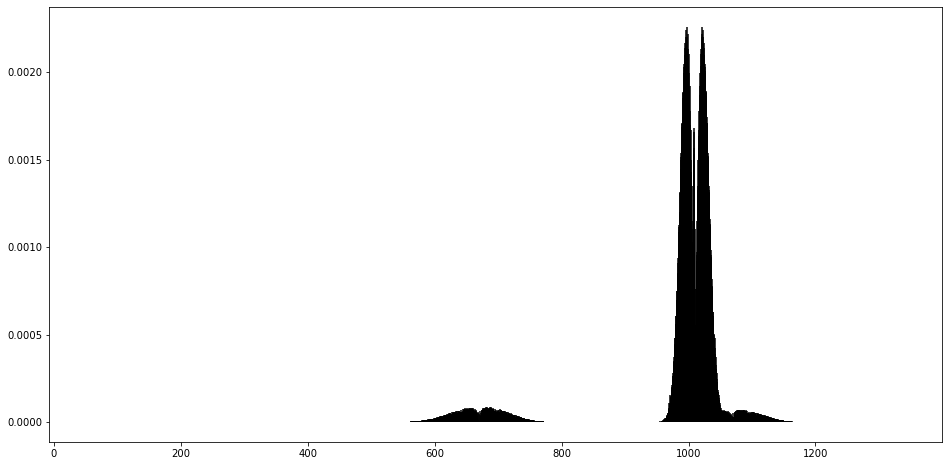

In [29]:
Pos = np.concatenate((P_nu1, Q_nu1, R_nu1, P_nu2, Q_nu2, R_nu2, P_nu3, Q_nu3, R_nu3))
Pos = np.reshape(Pos, (len(Pos),1))
Int = np.concatenate((Final_I[0], Final_I[1], Final_I[2], Final_I[3], Final_I[4], Final_I[5], Final_I[6], Final_I[7], Final_I[8]))
Int = np.reshape(Int, (len(Int),1))
Pos_and_Int = np.concatenate((Pos,Int), axis=1)
np.savetxt("O3_777_13DaLo_outputdata_WN_and_INT.txt", Pos_and_Int, delimiter=",")
#Quick double check of the data saved
plt.figure(figsize=(16,8))
plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])